#### **Flip the coins**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import AnchoredText
from scipy.stats import norm

**Define the function**

In [2]:
def flip_coins(trials, n_coins):
      final_tails = []
      # flip n coins every trial
      for x in range(trials):
            tails = [0]
            # flip the coin n times
            for x in range(n_coins):
                  coin = np.random.randint(0, 2)
                  tails.append(tails[x] + coin)
            final_tails.append(tails[-1])
      return final_tails

**Define the N of trials and coins**

In [3]:
tries = [5, 10, 25, 50, 100, 200, 500, 1000]
n_coins = 100

**Plot the density histogram and fir a normal distribution to the data**

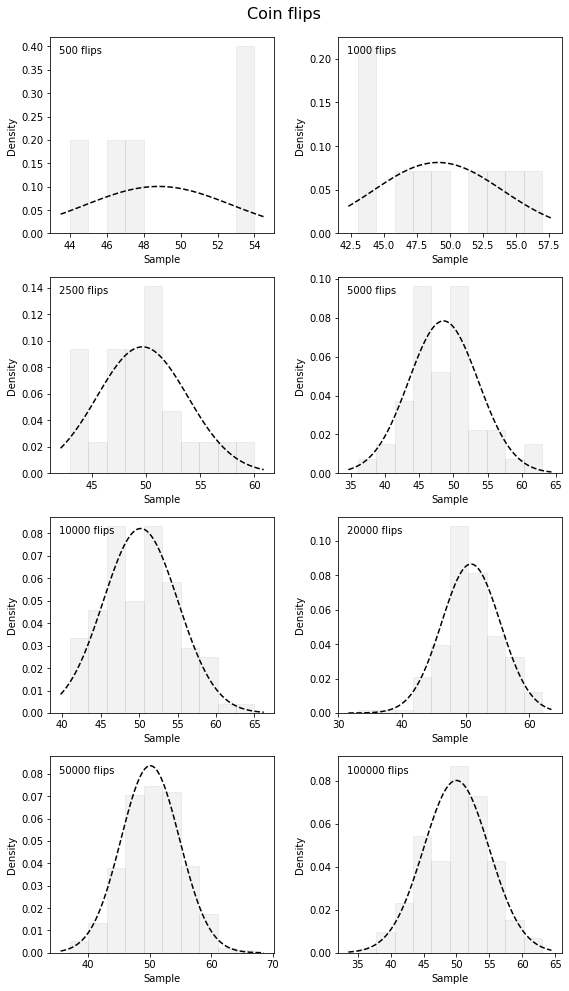

In [4]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(8, 14))
fig.suptitle("Coin flips", fontsize=16)
axes = ax.ravel()

for i, n in enumerate(tries):
      flip = flip_coins(n, n_coins)
      axes[i].hist(flip, color="k", edgecolor="k", density=True, alpha=0.05)

      # Fit a normal distribution to the data:
      mean, std = norm.fit(flip) 
      # Plot the PDF.
      xmin, xmax = axes[i].get_xlim()
      ymin, ymax = axes[i].get_ylim()
      x = np.linspace(xmin, xmax, 100)
      p = norm.pdf(x, mean, std)
      axes[i].plot(x, p, "k", linestyle="--")

      # add text
      at = AnchoredText(f"{n_coins*n} flips", frameon=False, loc="upper left")
      axes[i].add_artist(at)

      axes[i].set_ylabel("Density")
      axes[i].set_xlabel("Sample")

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()